# Inaugural Project

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from exchangeeconomy import ExchangeEconomyClass

# Question 1

In [63]:
model = ExchangeEconomyClass()

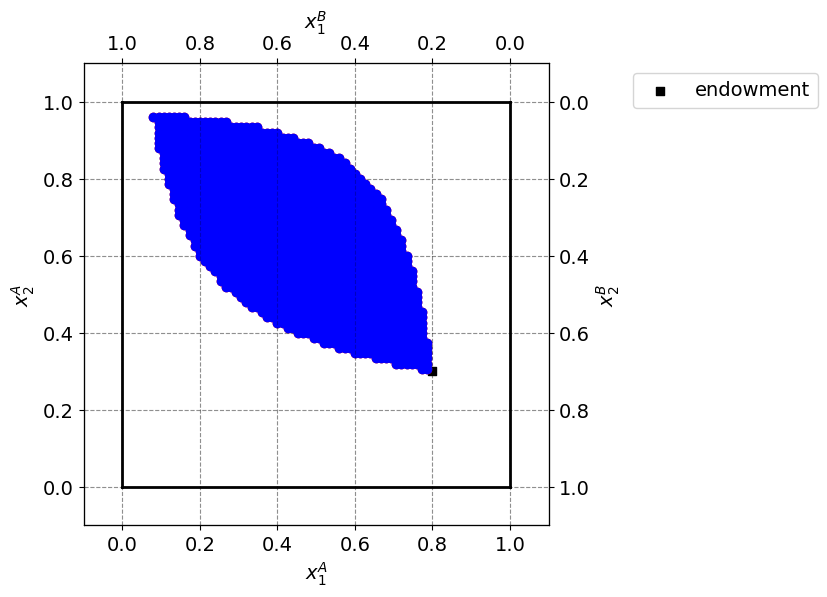

In [64]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(omegaA1, omegaA2) and model.utility_B(xB1, xB2) >= model.utility_B(omegaB1, omegaB2):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', label='Valid points A')
#NOT SURE WHAT THIS ax_A purpose is
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', label='Valid points B')


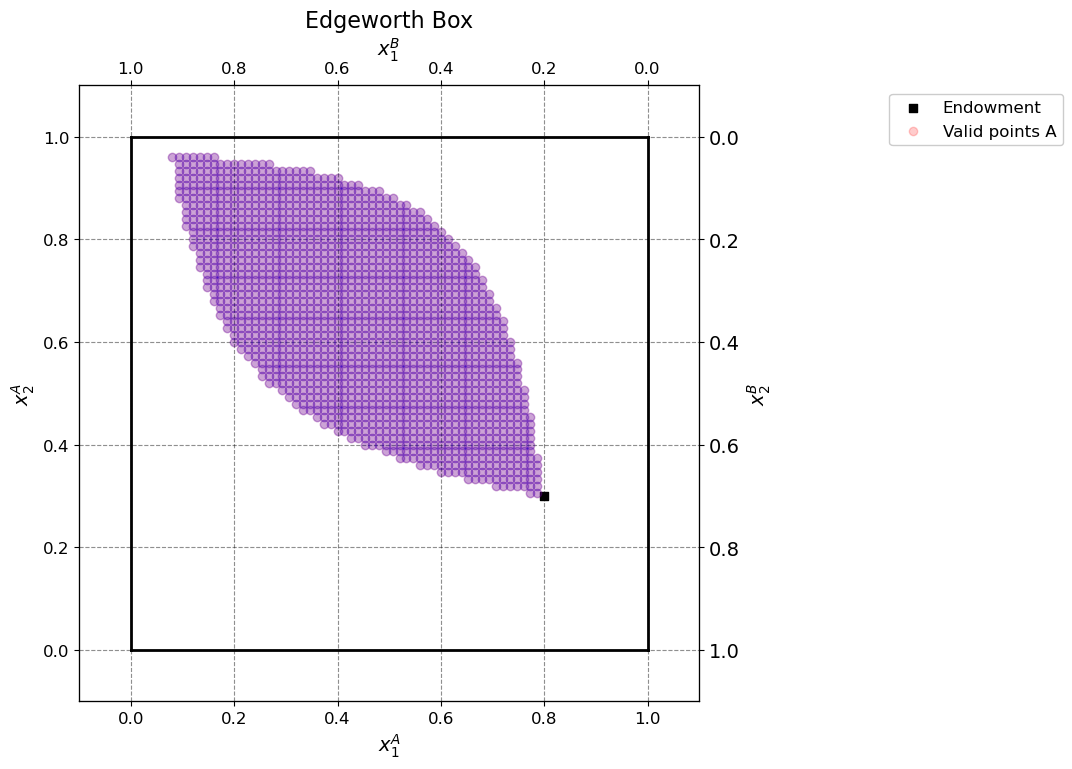

In [65]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=True, figsize=(8, 8), dpi=100)
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$", fontsize=14)
ax_A.set_ylabel("$x_2^A$", fontsize=14)

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$", fontsize=14)
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$", fontsize=14)
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')

# Limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Set tick label sizes
ax_A.tick_params(axis='both', labelsize=12)
ax_B.tick_params(axis='both', labelsize=12)

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(omegaA1, omegaA2) and model.utility_B(xB1, xB2) >= model.utility_B(omegaB1, omegaB2):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', alpha=0.2, label='Valid points A')
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', alpha=0.2, label='Valid points B')

# Add legend and title
legend = ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0), fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)

plt.title('Edgeworth Box', fontsize=16)

plt.show()

# Question 2

In [66]:
# Define the price set P1
N = 75
P1 = np.linspace(0.5, 2.5, N+1)  # Using linspace for correct increments

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price level in P1
for p1 in P1:
    # Calculate p2 based on numeraire condition
    p2 = 1.0  # p2 is the numeraire and is set to 1
    
    # Calculate demanded quantities for both consumers
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1) 
    
    # Calculate market clearing errors
    epsilon1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))  # Corrected calculation
    epsilon2 = xA2 + xB2 - (model.par.w2A + (1 - model.par.w2A))  # Corrected calculation
    
    # Append errors to lists
    errors_1.append(epsilon1)
    errors_2.append(epsilon2)

# Print errors for each price level
for i, p1 in enumerate(P1):
    print(f"Price level p1 = {p1:.2f}: Error 1 = {errors_1[i]:.8f}, Error 2 = {errors_2[i]:.8f}")



Price level p1 = 0.50: Error 1 = 0.53333333, Error 2 = -0.26666667
Price level p1 = 0.53: Error 1 = 0.47594937, Error 2 = -0.25066667
Price level p1 = 0.55: Error 1 = 0.42409639, Error 2 = -0.23466667
Price level p1 = 0.58: Error 1 = 0.37701149, Error 2 = -0.21866667
Price level p1 = 0.61: Error 1 = 0.33406593, Error 2 = -0.20266667
Price level p1 = 0.63: Error 1 = 0.29473684, Error 2 = -0.18666667
Price level p1 = 0.66: Error 1 = 0.25858586, Error 2 = -0.17066667
Price level p1 = 0.69: Error 1 = 0.22524272, Error 2 = -0.15466667
Price level p1 = 0.71: Error 1 = 0.19439252, Error 2 = -0.13866667
Price level p1 = 0.74: Error 1 = 0.16576577, Error 2 = -0.12266667
Price level p1 = 0.77: Error 1 = 0.13913043, Error 2 = -0.10666667
Price level p1 = 0.79: Error 1 = 0.11428571, Error 2 = -0.09066667
Price level p1 = 0.82: Error 1 = 0.09105691, Error 2 = -0.07466667
Price level p1 = 0.85: Error 1 = 0.06929134, Error 2 = -0.05866667
Price level p1 = 0.87: Error 1 = 0.04885496, Error 2 = -0.0426

# Question 3

What is market clearing price?

To get market clearing price we need to have both error terms == 0
Walras law: if one market clears also the other will
Use iterative method to get the error very close to zero
Look at notebook on random numbers example

In [67]:
p1_guess = 0.94
kappa = 0.1 # Adjustment factor for solving
eps = 1e-9 # Tolerance parameter for solving
maxiter=1000 # Maximum iterations when solving
model.find_equilibrium(p1_guess, kappa, eps, maxiter)

Iteration 0: p1 = 0.94000000, excess demand eps1 = 0.00283688, eps2 = -0.00266667
Iteration 1: p1 = 0.94028369, excess demand eps1 = 0.00265500, eps2 = -0.00249645
Iteration 2: p1 = 0.94054919, excess demand eps1 = 0.00248488, eps2 = -0.00233715
Iteration 3: p1 = 0.94079768, excess demand eps1 = 0.00232575, eps2 = -0.00218806
Iteration 4: p1 = 0.94103025, excess demand eps1 = 0.00217689, eps2 = -0.00204852
Iteration 5: p1 = 0.94124794, excess demand eps1 = 0.00203762, eps2 = -0.00191790
Iteration 6: p1 = 0.94145170, excess demand eps1 = 0.00190732, eps2 = -0.00179565
Iteration 7: p1 = 0.94164243, excess demand eps1 = 0.00178540, eps2 = -0.00168121
Iteration 8: p1 = 0.94182097, excess demand eps1 = 0.00167132, eps2 = -0.00157408
Iteration 9: p1 = 0.94198810, excess demand eps1 = 0.00156457, eps2 = -0.00147380
Iteration 10: p1 = 0.94214456, excess demand eps1 = 0.00146467, eps2 = -0.00137993
Iteration 11: p1 = 0.94229103, excess demand eps1 = 0.00137118, eps2 = -0.00129205
Iteration 12: 

0.9444444305127372

In [68]:
model.print_solution()

Market-clearing prices:
p1 = 0.94444443
p2 = 1.00000000

Corresponding excess demands at equilibrium:
Z1 (Good 1) = +0.00000001
Z2 (Good 2) = -0.00000001



# Question 4a

Assume that A chooses the price to maximize her own utility <br>
4A: Find the allocation if only prices in P1 can be chosen

In [69]:
from types import SimpleNamespace 
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [70]:
#Iterative loop to find the solution

In [71]:
# Define the number of points in the grid
N = 75

# Define the range of values for p1
P1 = np.array([0.5 + 2*i/N for i in range(N+1)])

# Initialize variables to store the best utility and corresponding p1 value
utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number

# Iterate over each value of p1
for p1 in P1:
    # Calculate the utility for agent A using the given formula
    arguments = (1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])
    utility = model.utility_A(*arguments)
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        p1_best = p1
        best_arguments = arguments

# Print the result
print(f'Best utility is {utility_best:.8f} at p1 = {p1_best:.8f}')
print(f'Arguments of utility function at the best point: {best_arguments}')

Best utility is 0.63361599 at p1 = 1.88666667
Arguments of utility function at the best point: (0.619316843345112, 0.6408888888888888)


# Question 4b

Find the allocation if any positive price can be chosen

In [72]:
# Define the range of values for p1
p1_values = np.linspace(0.01, 10, 1000)  # Adjust the range and number of points as needed

# Initialize variables to store the best utility and corresponding p1 value
max_utility = -np.inf
optimal_p1 = None

# Iterate over each value of p1
for p1 in p1_values:
    # Calculate the utility for agent A using the given formula
    utility = model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > max_utility:
        max_utility = utility
        optimal_p1 = p1

# Print the result
print(f'Optimal utility is {max_utility:.8f} at p1 = {optimal_p1:.8f}')

Optimal utility is 0.63362084 at p1 = 1.90000000


# Question 5a

In [73]:
# Initialize a variable to store the max utility found for A and the corresponding allocation
max_utility_A = -np.inf  # Start with a very low utility value
optimal_allocation_A = None

# Iterate over all valid allocations in Set C
for point in valid_points_A:
    utility_A_at_point = model.utility_A(*point)
    if utility_A_at_point > max_utility_A:
        max_utility_A = utility_A_at_point
        optimal_allocation_A = point

print(f"Optimal allocation for A in Set C: {optimal_allocation_A}, with utility: {max_utility_A}")

Optimal allocation for A in Set C: (0.56, 0.8533333333333334), with utility: 0.7415523509091093


# Question 5b

In [74]:
from scipy.optimize import minimize

# Objective function for optimization (negative utility for minimization)
def objective(x):
    return -model.utility_A(x[0], x[1])

# Constraints ensuring B is not worse off than at the initial endowment
constraints = ({
    'type': 'ineq',
    'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(omegaB1, omegaB2)
})

# Bounds for the decision variables (goods can't be negative or exceed total endowment)
bounds = [(0, 1), (0, 1)]

# Starting guess (can be the initial endowments)
initial_guess = [omegaA1, omegaA2]

# Perform the optimization
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation_B = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal unrestricted allocation for A: {optimal_allocation_B}, with utility: {optimal_utility_A}")
else:
    print("Optimization was not successful. Check the setup and constraints.")

Optimal unrestricted allocation for A: [0.57574506 0.84443779], with utility: 0.7432276287150864


# Question 6a

In [75]:
from scipy.optimize import minimize

# Define the objective function to maximize utility for everyone
def objective_function1(demand):
    x1A, x2A = demand
    return -model.utility_aggregate(x1A, x2A)

# Initial guess for demand
initial_demand = [0.5, 0.5]  # Starting from balanced prices

# Set bounds for demand (both should be between 0 and 1)
bounds = [(0, 1), (0, 1)]

# Find the maximum of the utility function with respect to x1A and x2A
res = minimize(objective_function1, initial_demand, method='SLSQP', bounds=bounds)

# Extract the optimal values of x1A and x2A and the corresponding utility value
x1A_optimal, x2A_optimal = res.x
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at x1A = {x1A_optimal:.8f} and x2A = {x2A_optimal:.8f}')

Optimal utility is 1.05826735 at x1A = 0.33341166 and x2A = 0.66658831


# Question 6b

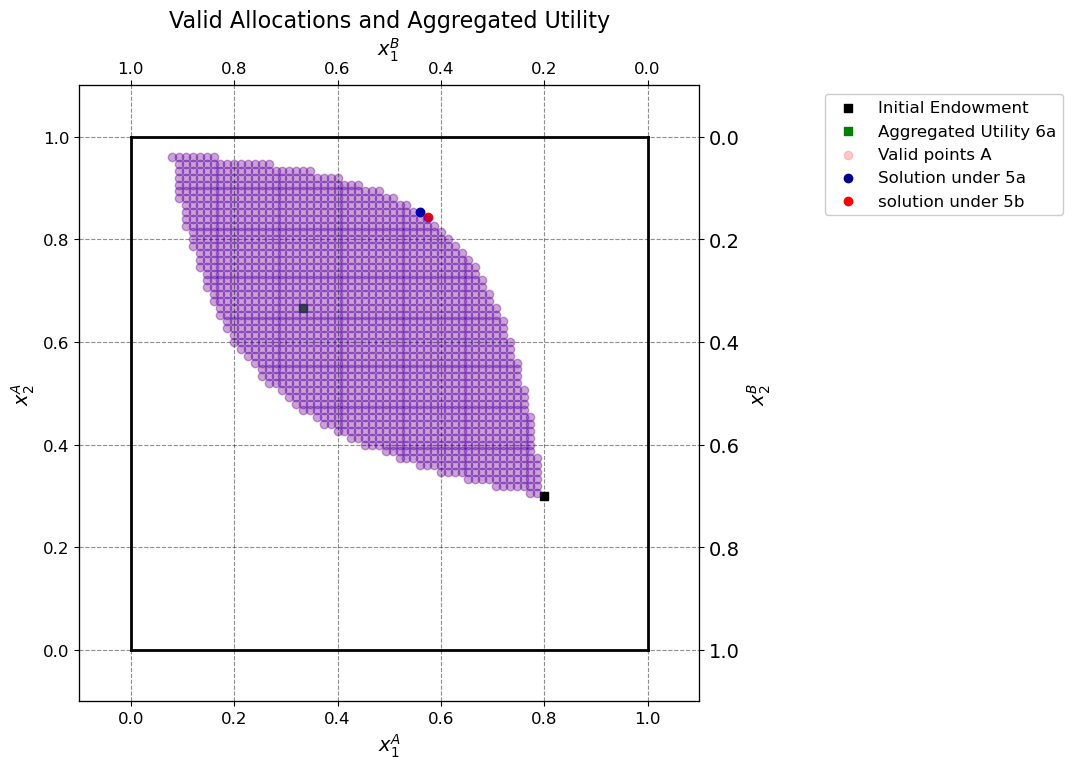

In [76]:
# Initialize the model with parameters
par = model.par
model = ExchangeEconomyClass()

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# b. figure set up
fig = plt.figure(frameon=True, figsize=(8, 8), dpi=100)
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$", fontsize=14)
ax_A.set_ylabel("$x_2^A$", fontsize=14)

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$", fontsize=14)
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$", fontsize=14)
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Initial Endowment')
ax_A.scatter(x1A_optimal, x2A_optimal, marker='s', color='green', label='Aggregated Utility 6a')

# Limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Set tick label sizes
ax_A.tick_params(axis='both', labelsize=12)
ax_B.tick_params(axis='both', labelsize=12)

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(xB1, xB2) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', label='Valid points A', alpha=0.2)
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', label='Valid points B', alpha=0.2)

## plotting 4a 
# ax_A.scatter(x1_0, x2_0, marker = 'o', color = "purple", label = "solution under 4a")
## plotting 4b 
# ax_A.scatter(x1_sol_4b, x2_sol_4b, marker = 'o', color = "pink", alpha = 0.6, label = "solution under 4b")

# plotting 5a 
x1_0, x2_0 = optimal_allocation_A  # solution under 5a
ax_A.scatter(x1_0, x2_0, marker='o', color='darkblue', label='Solution under 5a')
# Plot solutions for 5b
x1_optimal_5b, x2_optimal_5b = optimal_allocation_B  # solution under 5b
ax_A.scatter(x1_optimal_5b, x2_optimal_5b, marker='o', color='red', label='solution under 5b')

# Add legend and title
legend = ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0), fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)

plt.title('Valid Allocations and Aggregated Utility', fontsize=16)

plt.show()

 Pros and Cons Discussion

When comparing the results, we observe that all solutions lie within the Edgeworth box, indicating that no one is worse off compared to the initial endowment. There is a slight overlap between solutions 4a and 4b due to their proximity, as well as between solutions 5a and 5b. Among all the results, the solution in 6a appears to be the most appropriate when considering the maximization of both utility functions as a sum. The solution in 6a takes both individuals into account equally and is positioned roughly between the solutions to questions 4 and 5. In question 4, person A maximizes their own utility. In question 5, person A begins to consider person B's utility as well. In question 6, consumption is determined by a utilitarian social planner, leading to these different solutions.

# Question 7

In [77]:
# Define the number of elements in the set
num_elements = 50
np.random.seed(1657)
# Generate random values for omega1A and omega2A
omega1A_values = np.random.uniform(0, 1, num_elements)
omega2A_values = np.random.uniform(0, 1, num_elements)

# Combine omega1A and omega2A into tuples to form the set W
W = [(omega1A_values[i], omega2A_values[i]) for i in range(num_elements)]

# Print the set W
print("Set W:")
for pair in W:
    print(pair)

Set W:
(0.03718351942671205, 0.4912287736846508)
(0.6168569653089924, 0.6367950024204542)
(0.6406269404363998, 0.6112780382211228)
(0.8573269547351067, 0.9739248412103715)
(0.4616819736824014, 0.5665776679002624)
(0.3812133069163124, 0.8452358269684767)
(0.7731702922130856, 0.1860315420376264)
(0.12156942574361962, 0.0725360793521227)
(0.6033931022242555, 0.09594284046922419)
(0.07178016761169081, 0.5017350175013514)
(0.716349694441655, 0.23572264597007997)
(0.8759132158949587, 0.19287612448766434)
(0.43660969844969155, 0.04670152810296624)
(0.978748605332997, 0.1954707902717897)
(0.9812152360461119, 0.3515322444271103)
(0.8685321486533855, 0.2222059026987705)
(0.35745660503994614, 0.566261151899644)
(0.16310480833068564, 0.5453340483878013)
(0.8741672533092805, 0.00042745667156707245)
(0.4422145176776947, 0.6897808208057735)
(0.6554761632015913, 0.1552880602734119)
(0.3942280121605818, 0.816595356922174)
(0.4060721713298544, 0.824637096391279)
(0.7446022281985852, 0.5620150407146959)


# Question 8

Find the market equilibrium allocation for each $w^{A}$ ∈ C and plot them in the Edgeworth box

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

list_omega_1 = np.random.rand(50,1)
list_omega_2 = np.random.rand(50,1)

type(list_omega_1)
omega_1_pack= np.ndarray.tolist(list_omega_1)
type(omega_1_pack)

type(list_omega_2)
omega_2_pack = np.ndarray.tolist(list_omega_2)
type(omega_2_pack)

#Defining constraints
constraint_1 = {'type': 'ineq', 'fun': lambda x : model.utility_B_mark(1 - x[0], 1 - x[1]) - model.utility_B_mark(1-w1A, 1-w2A)}
constraint_2 = {'type': 'ineq', 'fun': lambda x : model.utility_A_mark(x[0], x[1]) - model.utility_A_mark(w1A, w2A)}

market_equilibrium = []

print(market_equilibrium)

for w1A_list, w2A_list in zip(omega_1_pack, omega_2_pack):
    for w1A, w2A in zip(w1A_list, w2A_list):
    # Define constraints inside the loop with specific values of w1A and w2A
           x0 = [w1A, w2A]
           market_equilibrium_allocation = minimize(model.utility_aggregate_equilibrium, x0, bounds=[(0, 1), (0, 1)], constraints=[constraint_1,constraint_2])
           market_equilibrium.append(market_equilibrium_allocation.x)
market_equilibrium

[]


[array([0.33330978, 0.66664661]),
 array([0.10260528, 0.31392302]),
 array([0.35955449, 0.69274672]),
 array([0.43571408, 0.75542338]),
 array([0.50448885, 0.80282135]),
 array([0.2690492 , 0.59550011]),
 array([0.29776735, 0.62896726]),
 array([0.2580399 , 0.58178681]),
 array([0.66179149, 0.88669122]),
 array([0.30940235, 0.6418126 ]),
 array([0.33329422, 0.66687752]),
 array([0.45181881, 0.76727173]),
 array([0.33445137, 0.66695575]),
 array([0.50110458, 0.80070339]),
 array([0.44274589, 0.76065437]),
 array([0.38098871, 0.71109296]),
 array([0.3327548 , 0.66607952]),
 array([0.33334752, 0.66714747]),
 array([0.3333639 , 0.66670435]),
 array([0.05321755, 0.18354694]),
 array([0.0521496, 0.1804428]),
 array([0.17337721, 0.45621275]),
 array([0.33341583, 0.66713438]),
 array([0.29574852, 0.62701233]),
 array([0.24974933, 0.57110806]),
 array([0.33384457, 0.66725986]),
 array([0.0440372 , 0.15562605]),
 array([0.28075351, 0.60959794]),
 array([0.34846419, 0.68152578]),
 array([0.043656

Text(0.5, 1.0, 'Market equilibrium allocations for $w^{A}$')

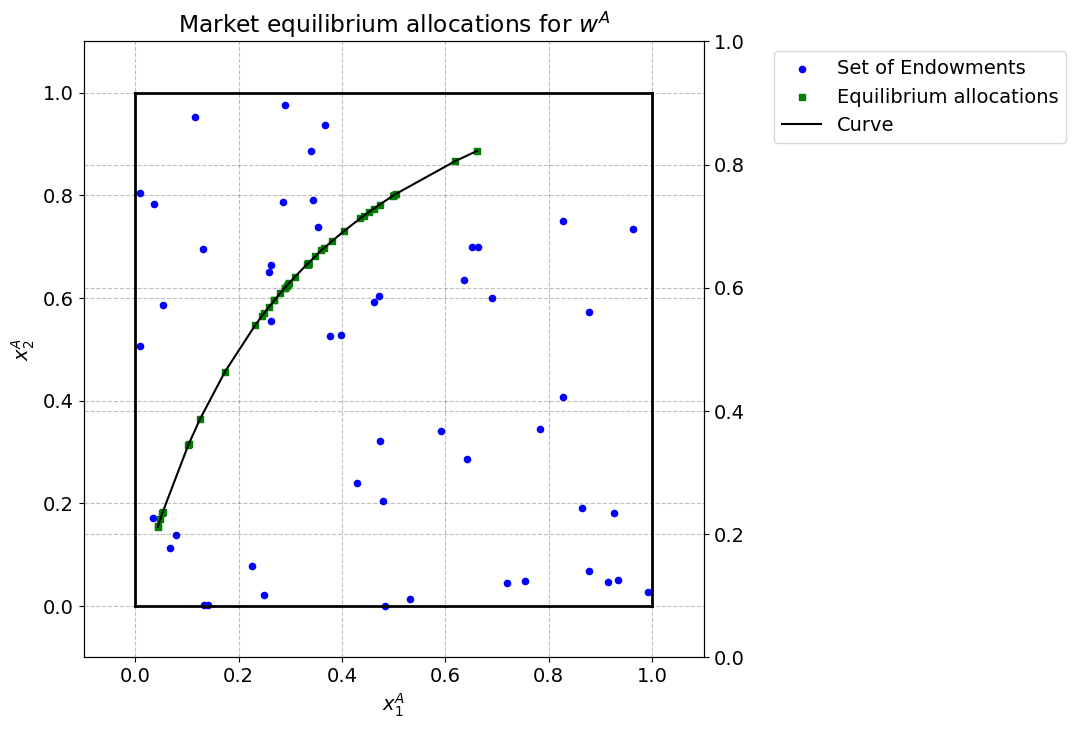

In [79]:
# Plotting the Edgeworth box
fig = plt.figure(frameon=True,figsize=(8,8), dpi=100)
ax_A=fig.add_subplot(1,1,1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()

# Setting limits in each axes
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    

#Plotting the set of equilibrium
ax_A.scatter(list_omega_1, list_omega_2, color='blue', label='Set of Endowments', s=20)

#Plotting market equilibrium 
x_values = [point[0] for point in market_equilibrium]
y_values = [point[1] for point in market_equilibrium]
ax_A.scatter(x_values, y_values, color='green', marker='s', s=15, label='Equilibrium allocations')

# Plotting a line curve
sorted_x_values = sorted(x_values)
sorted_y_values = [y for _, y in sorted(zip(x_values, y_values))] 
ax_A.plot(sorted_x_values, sorted_y_values, color='black', label='Curve') 

# Displaying grid lines on the plot
ax_A.grid(True)
ax_A.legend(bbox_to_anchor=(1.8, 1.05))

# Adding a legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6,1.0));

# Adding a title
ax_A.set_title('Market equilibrium allocations for $w^{A}$')